# Sales Channel Prediction Case Study - 

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

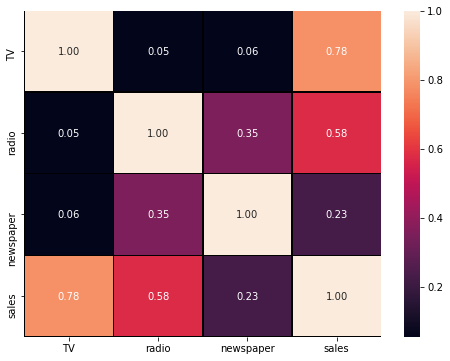

In [8]:
# Heatmap
# Corr using heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,linewidth=.5,linecolor='black',fmt='.2f')

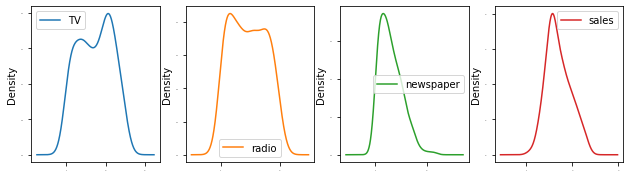

In [9]:
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,fontsize=1,figsize=(30,20))
plt.show()

In [10]:
x=df.drop('sales',axis=1) # Split data dependent & independent variable in x & y before removing skewness
y=df['sales']

In [11]:
x.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

In [12]:
# Remove the Skweness of the data
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [13]:
x.skew().sort_values(ascending=False)

newspaper   -0.077942
radio       -0.242968
TV          -0.315199
dtype: float64

In [14]:
# Outliers Check
x.dtypes

TV           float64
radio        float64
newspaper    float64
dtype: object

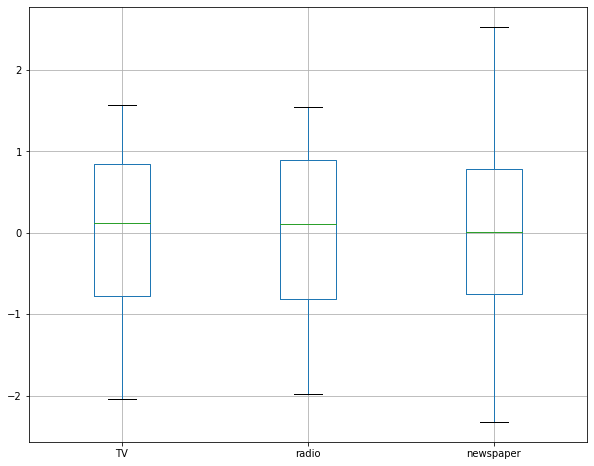

In [15]:
x.boxplot(figsize=[10,8])
plt.show()

In [16]:
# Scatter Plot Showing How Target Variable Sales is Related to Other Variables

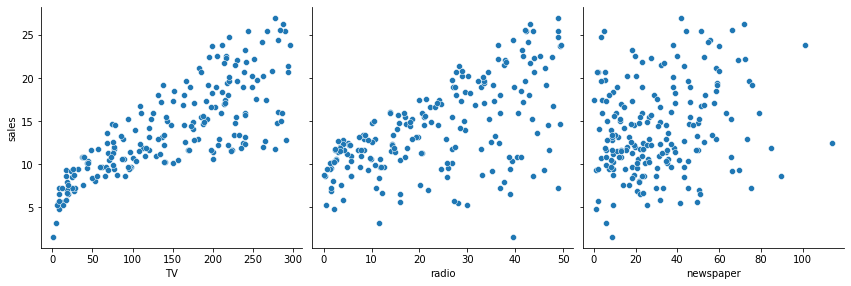

In [17]:
import seaborn as sns
sns.pairplot(df,x_vars=['TV','radio','newspaper'],y_vars='sales',height=4,aspect=1,kind='scatter')
plt.show()

In [18]:
# Training process
# Min-max scaler
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [19]:
for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        lr.fit(x_train,y_train) # Fitting the data will train the model
        pred_train=lr.predict(x_train) # Predicting the data # Predicted traget variable
        pred_test=lr.predict(x_test)
        print(f'At Random State {i}, the training accuracy is :- {r2_score(y_train,pred_train)}')
        print(f'At Random State {i}, the training accuracy is :- {r2_score(y_test,pred_test)}')
        print("\n")

At Random State 0, the training accuracy is :- 0.9129495390360743
At Random State 0, the training accuracy is :- 0.8838865502815021


At Random State 1, the training accuracy is :- 0.9071938747219684
At Random State 1, the training accuracy is :- 0.8962223515318661


At Random State 2, the training accuracy is :- 0.9183341288802332
At Random State 2, the training accuracy is :- 0.8134661880809735


At Random State 3, the training accuracy is :- 0.9044922374546075
At Random State 3, the training accuracy is :- 0.9176823268482114


At Random State 4, the training accuracy is :- 0.9058334490016561
At Random State 4, the training accuracy is :- 0.8999332568068064


At Random State 5, the training accuracy is :- 0.9057996837685972
At Random State 5, the training accuracy is :- 0.9111155103873196


At Random State 6, the training accuracy is :- 0.9031637800959937
At Random State 6, the training accuracy is :- 0.9263228920019168


At Random State 7, the training accuracy is :- 0.9024328978288

In [20]:
# Check Overfitting - Use Cross Validation Score

In [21]:
# Cross Validation
Train_accuracy = r2_score(y_train,pred_train)
Test_accuracy = r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is  {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')

At cross fold 2 the cv score is  0.9042245206305917 and accuracy score for training is 0.9011286161276886 and accuracy score for testing is 0.9289415808839093


At cross fold 3 the cv score is  0.9005133366024932 and accuracy score for training is 0.9011286161276886 and accuracy score for testing is 0.9289415808839093


At cross fold 4 the cv score is  0.9010704953541406 and accuracy score for training is 0.9011286161276886 and accuracy score for testing is 0.9289415808839093


At cross fold 5 the cv score is  0.8978060430607071 and accuracy score for training is 0.9011286161276886 and accuracy score for testing is 0.9289415808839093


At cross fold 6 the cv score is  0.9020141622653224 and accuracy score for training is 0.9011286161276886 and accuracy score for testing is 0.9289415808839093


At cross fold 7 the cv score is  0.8982025458270028 and accuracy score for training is 0.9011286161276886 and accuracy score for testing is 0.9289415808839093


At cross fold 8 the cv score is  0

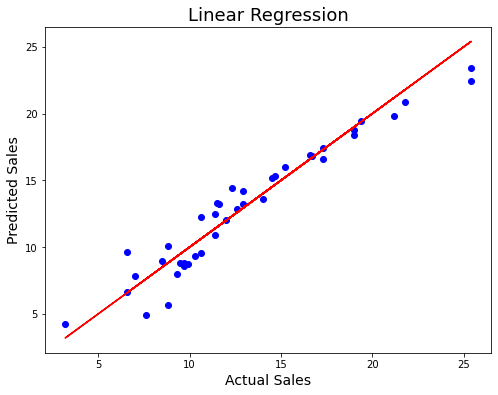

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='blue')
plt.plot(y_test,y_test,color='r')
plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

In [23]:
# Regularization

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,20))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [25]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.8494881001951005

In [26]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

82.70960357806553

In [27]:
# Ensemble Technique

In [28]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [30]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
decision=rf.predict(x_test)
rfs=r2_score(y_test,decision)
print('R2 Score:',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Validation Score :',rfc*100)

R2 Score: 98.39038078184916
Cross Validation Score : 97.58367765492765


In [31]:
# Pickeling of file or serialization of a file
import pickle
filename='Advertising.pkl'
pickle.dump(rf,open(filename,'wb'))

In [32]:
Model=pickle.load(open('Advertising.pkl','rb'))
result=Model.score(x_test,y_test)
print(result)

0.9839038078184916


In [33]:
Conclusion = pd.DataFrame([Model.predict(x_test)[:],decision[:]],index=['Predicted','Original'])
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,11.356,9.215,10.252,8.266,7.153,22.831,12.265,25.128,6.153,18.062,...,11.57,24.919,18.469,12.068,10.567,14.717,12.993,16.743,11.732,8.521
Original,11.356,9.215,10.252,8.266,7.153,22.831,12.265,25.128,6.153,18.062,...,11.57,24.919,18.469,12.068,10.567,14.717,12.993,16.743,11.732,8.521


# Thank You...!